<a href="https://colab.research.google.com/github/Marlup/Compound-calculator.ipynb/blob/main/Compound_calculator_and_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

https://www.bizskinny.com/Finance/Compound-Interest/compound-interest-with-monthly-contributions.php

In [2]:
def composed_return(p, yc, r, y, t, return_acum_roi=False):
  # We assume returns occur once the contribution is added.
    term_roi = r / t
    pc = yc / t

    acum_roi = (1 + term_roi) ** (y * t)
    principal_term = p * acum_roi
    contribution_term = (pc * (acum_roi - 1)) / term_roi
    p_t1 =  principal_term + contribution_term
    if return_acum_roi:
        return round(p_t1, 2), round(acum_roi, 2)
    return round(p_t1, 2)

In [6]:
def earning_by_time(principal, 
                    roi, 
                    years,
                    freq_comp,
                    yearly_contribution=0,
                    on_taxes=False,
                    taxes_per=0):
    MONTHS = 12
    money_t = principal
    earnings_per_year = []
    if (freq_comp is None) or (freq_comp < 1):
        freq_comp = 1
    monthly_contribution = yearly_contribution / MONTHS
    monthly_roi = roi / freq_comp
    c = 0
    for year in range(years):
        #print('----------')
        for month in range(1, MONTHS + 1):
            if c % (12 // freq_comp) == 0:
                #print(c)
                earning = money_t * monthly_roi
                earnings_per_year.append(earning)
                c = 0
            else:
                earning = 0.0
            # Interest computed before contribution (downer benefit)
            money_t += earning + monthly_contribution
            c += 1
            if on_taxes:
                money_t -= sum(earnings_per_year[y * 12:(y + 1) * 12]) * taxes_per
    return money_t, earnings_per_year

Calculation of composed return. Composed return function

In [50]:
# Calculation of composed return. Composed return function
principal_amount = 5900
min_contribution = 50
year_periods = 12
yearly_contribution = min_contribution * year_periods
roi = 0.09
years = 30
freq = 1
periodic_contribution = yearly_contribution / freq

composed_return(principal_amount, yearly_contribution, roi, years, freq, True)

(160063.83, 13.27)

Calculation of composed return. Simulation

In [52]:
total_money, earnings = earning_by_time(principal_amount, 
                                        roi, 
                                        years, 
                                        freq, 
                                        yearly_contribution)

print('Total income, earnings and total input contribution')

total_earnings = sum(earnings)
total_input_contribution = total_money - total_earnings
earning_per_contribution = total_earnings / (total_money - total_earnings)

round(total_money, 2), round(total_earnings, 2), round(total_input_contribution, 2), round(earning_per_contribution, 2)

Total income, earnings and total input contribution


(440476.2, 340476.2, 100000.0, 3.4)

## Scenario

In [83]:
def build_dataframe(data):
    index = pd.MultiIndex.from_tuples(list(data.keys()))
    df = pd.DataFrame(list(data.values()), index=index)
  
    df = df.reset_index()
    df.columns = ['initial_amount', 'roi', 'year', 'term', 'amount']
    return df
def define_scenario(initial_mounts, rois, years, terms, contribution):
    accumulated_money = {}
    for money in initial_mounts:
        for roi in rois:
            for year in years:
                for term in terms:
                    total_money, _ = earning_by_time(money, roi, year, term, contribution)
                    accumulated_money[(money, roi, year, term)] = total_money
    
    return build_dataframe(accumulated_money)

In [93]:
step_amount = 5_000
max_amount = 20_000
virtual_returns = np.arange(0.06, 0.12, 0.02)
years_of_investment = np.arange(5, 30 + 5, 5)
terms = (1, )
yearly_contribution = 50 * 12
results = define_scenario(np.arange(step_amount, max_amount + step_amount, step_amount), 
                          virtual_returns,
                          years_of_investment, 
                          terms,
                          yearly_contribution
                          )
results.drop("term", axis=1, inplace=True)

In [94]:
results

,initial_amount,roi,year,amount
0,5000,0.06,5,10073.383664
1,5000,0.06,10,16862.715448
2,5000,0.06,15,25948.372896
3,5000,0.06,20,38107.032083
4,5000,0.06,25,54378.060796
...,...,...,...,...
67,20000,0.10,10,61437.303963
68,20000,0.10,15,102608.452405
69,20000,0.10,20,168914.998682
70,20000,0.10,25,275702.354528


     roi         amount
41  0.06  133587.279323
47  0.08  218909.780004
53  0.10  360437.447647


Text(0.5, 1.0, '                    Initial amount: 15000\nYears: 30\nTerms: 1')

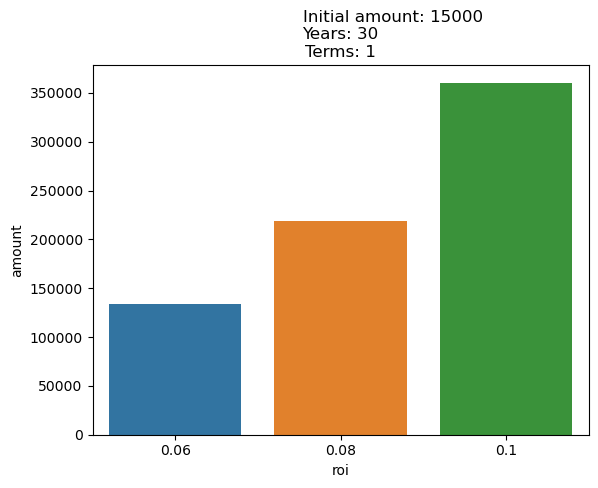

In [96]:
stage_ini_amount = 15_000
stage_years = 30
stage_rois = results[(results["initial_amount"] == stage_ini_amount) & \
                        (results["year"] == stage_years)
                        ][["roi", "amount"]]
print(stage_rois)
sns.barplot(data=stage_rois, 
            x="roi", 
            y="amount",
            )
plt.title(20*" " + f"Initial amount: {stage_ini_amount}\nYears: {years}\nTerms: {stage_terms}")

<h2>
Normal distribution of mean 0 and standard deviation of 1. What is the left and right points from which the total probability of being between those values is 0.99 (99%)?
<h2>

To determine the left and right points from which the total probability of being between those values is 0.99 (99%) for a standard normal distribution with a mean of 0 and a standard deviation of 1, we need to find the corresponding z-scores.

The total probability of being between two z-scores represents the area under the standard normal curve between those points. Since the standard normal distribution is symmetric, we can find the z-scores corresponding to the 0.005 (0.5% on each tail) and 0.995 (99.5% on each tail) probabilities.

Using a standard normal distribution table or a statistical calculator, we can find these z-scores.

The left z-score (the point from which the total probability to the left is 0.005) is approximately -2.576.
The right z-score (the point from which the total probability to the right is 0.005) is approximately 2.576.

Therefore, the left and right points from which the total probability of being between those values is 0.99 (99%) are approximately -2.576 and 2.576, respectively.

In [128]:
alpha = 0.01
roi = 0.06
std = 0.06
lower_q = scipy.stats.norm(0.0, std).ppf(alpha / 2)
upper_q = scipy.stats.norm(0.0, std).ppf(1 - (alpha / 2))
interval = upper_q - lower_q
alpha / 2, 1 - (alpha / 2), lower_q, upper_q, interval

(0.005, 0.995, -0.15454975821293404, 0.154549758212934, 0.3090995164258681)

In [19]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

In [129]:
def plot_temporal_serie(df, x_name, y_name, param):
  df_temp = df.copy()
  sns.scatterplot(data=df_temp, x=x_name, y=y_name, hue=param)

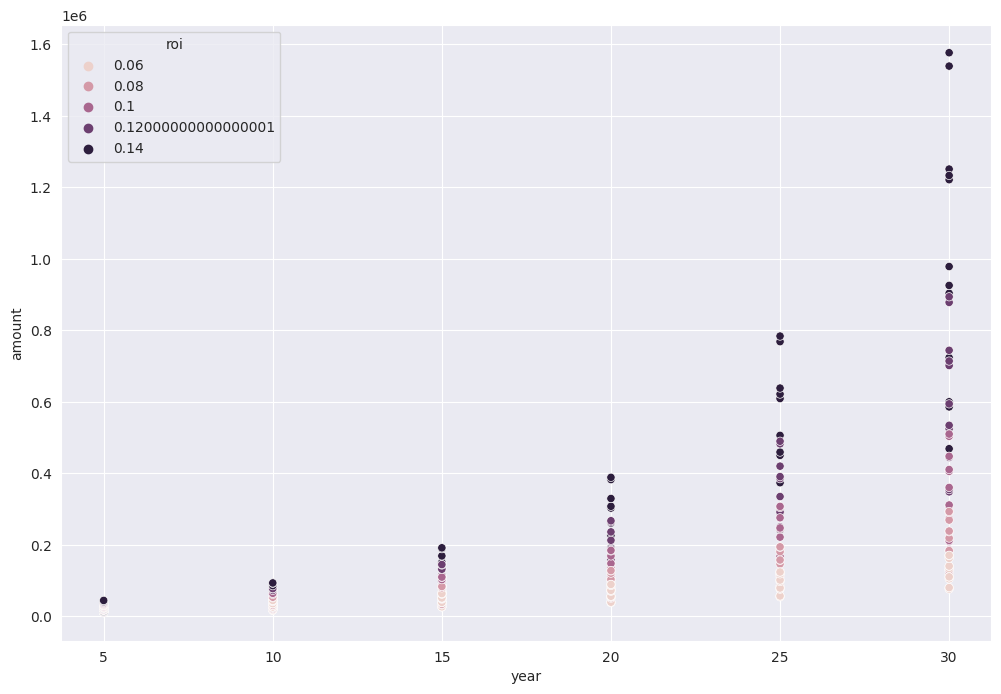

In [130]:
plt.figure(figsize=(12, 8))
plot_temporal_serie(results, 'year', 'amount', 'roi')

## Income estimation after retirement

Problem bounds:
1. Retirement occurs before or at 65.
1. Fixed income every month before taxes.
1. Define maximum lifespan.

In [98]:
retirement_ages = np.arange(40, 65 + 5, 5)
fixed_incomes = np.arange(1500, 5000 + 500, 500)
lifespans = np.arange(80, 100 + 5, 5)
MONTHS = 12

In [99]:
total_amounts = {}

for age in retirement_ages:
    for fixed_income in fixed_incomes:
        for lifespan in lifespans:
            age_dif = lifespan - age
            amount = fixed_income * age_dif * MONTHS
            key = (age, lifespan, fixed_income)

            total_amounts[key] = amount

In [100]:
return_amounts = pd.DataFrame(data=total_amounts.values(), 
                              index=total_amounts.keys(), 
                              columns=['amount_to_gather']
                              )
return_amounts.index.set_names(['age', 'lifespan', 'retirement_income'], 
                               inplace=True)
return_amounts

amount_to_gather
age lifespan retirement_income                  
40  80       1500                         720000
    85       1500                         810000
    90       1500                         900000
    95       1500                         990000
    100      1500                        1080000
...                                          ...
65  80       5000                         900000
    85       5000                        1200000
    90       5000                        1500000
    95       5000                        1800000
    100      5000                        2100000

[240 rows x 1 columns]

Cases:

1. retirement at 50, lifespan of 90 and retirement income of 2500
1. retirement at 65, lifespan of 90 and retirement income of 2000

In [101]:
return_amounts.loc[[(50, 90, 2500), 
                    (65, 90, 2000)], :]

,,,amount_to_gather
age,lifespan,retirement_income,
50,90,2500,1200000
65,90,2000,600000


### Virtual case of household expenses (1 person, medium-high standards)

In [113]:
months = 12
pct_unexpected_expenses = 0.1
pct_investment = 0.1

# Net income
yearly_net_income = 35000
years = 30
total_net_incomes = yearly_net_income * years

# Expenses
house_price = 600000
grosery_month = 600
light = 150
gas = 100
water = 50
comms = 150
insurances = 100
home_insurance = 500 / months
cloths_drugs_cleaning = 150
overall_maintenance = 200
# Unexpected expensed, two options:
# 1. Constant: 50
# 2. (prefered) Income dependent: 5 % to 10 % of monthly net income
unexpected_expenses = pct_unexpected_expenses * yearly_net_income / months
neighbourhood_community = 100
IBI_tax = 500 / months
garbage_tax = 100 / months
leisures = 200
holidays = 2000 / months
investments = pct_investment * yearly_net_income / months
total_month = (grosery_month, 
               light, 
               gas, 
               water,
               comms, 
               insurances, 
               cloths_drugs_cleaning, 
               overall_maintenance, 
               unexpected_expenses, 
               neighbourhood_community,
               IBI_tax, 
               home_insurance,
               garbage_tax,
               leisures,
               holidays,
               investments,
               )

total_expenses = house_price + sum(total_month) * years * months

print('Total month, total net income (salaries), total expenses')
sum(total_month), total_net_incomes, total_expenses #, total_expenses / (years * months)

Total month, total net income (salaries), total expenses


(2641.6666666666665, 1050000, 1551000.0)

In [104]:
# advance payment percentage
down_pct = 0.4
mortage_down_payment = house_price * down_pct
mortage_down_payment_per_month = (house_price - mortage_down_payment) / (months * years)
mortage_down_payment, mortage_down_payment_per_month

(240000.0, 1000.0)

Investment return

In [105]:
investments * months

3500.0

In [109]:
total_money, earnings = earning_by_time(principal=10000, 
                                        roi=0.1, 
                                        years=30, 
                                        freq_comp=1, 
                                        yearly_contribution=investments * months)
total_earnings = sum(earnings)
total_contribution = (total_money - total_earnings)
earnings_per_contribution = total_earnings / (total_money - total_earnings)
print('Total income, contribution, earnings and ratio earning-to-contribution (amount of earnings that I make per amount of contribution)')
n_round = 1
np.round(total_money, n_round), np.round(total_contribution, n_round), \
np.round(total_earnings, n_round), np.round(earnings_per_contribution, n_round)

Total income, contribution, earnings and ratio earning-to-contribution (amount of earnings that I make per amount of contribution)


(750223.1, 115000.0, 635223.1, 5.5)